In [16]:
import cv2
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense


In [17]:

base_test = "base_test"
base_train = "base_train"

In [18]:
train_datagen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator()


training_set = train_datagen.flow_from_directory(
        base_train,
        target_size=(200, 200),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')


test_set = test_datagen.flow_from_directory(
        base_train,
        target_size=(200, 200),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')


test_set.class_indices

Found 104 images belonging to 14 classes.


Found 104 images belonging to 14 classes.


{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13}

In [19]:
TrainClasses=training_set.class_indices

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
    
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
    

print("Mapping of Face and its ID",ResultMap)

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: '1', 1: '10', 2: '11', 3: '12', 4: '13', 5: '14', 6: '2', 7: '3', 8: '4', 9: '5', 10: '6', 11: '7', 12: '8', 13: '9'}

 The Number of output neurons:  14


In [20]:
classifier= Sequential()

classifier.add(Convolution2D(
    32,
    kernel_size=(5, 5),
    strides=(1, 1),
    input_shape=(200,200,1),
    activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(
    64,
    kernel_size=(5, 5),
    strides=(1, 1),
    activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

classifier.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=["accuracy"])


StartTime=time.time()


classifier.fit(
                    training_set,
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()

print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')


c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 4/30 ━━━━━━━━━━━━━━━━━━━━ 1:14 3s/step - accuracy: 0.1035 - loss: 565.9609

c:\Users\cleme\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 941ms/step - accuracy: 0.1138 - loss: 731.7250 - val_accuracy: 0.0673 - val_loss: 110.2934
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 809ms/step - accuracy: 0.1646 - loss: 13.2736 - val_accuracy: 0.2885 - val_loss: 2.5609
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 773ms/step - accuracy: 0.2866 - loss: 2.4811 - val_accuracy: 0.3077 - val_loss: 2.3273
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 744ms/step - accuracy: 0.3786 - loss: 2.0606 - val_accuracy: 0.6442 - val_loss: 1.3374
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 709ms/step - accuracy: 0.5493 - loss: 1.5105 - val_accuracy: 0.7692 - val_loss: 0.6742
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 855ms/step - accuracy: 0.6941 - loss: 0.8409 - val_accuracy: 0.8365 - val_loss: 0.5230
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 753ms/step - accuracy: 0.7852 - loss: 0.6476 - val_accuracy: 0.9423 - val_loss: 0.1783
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 878ms/step - accuracy: 0.8614 - loss: 0.4404 - val_accuracy: 

In [21]:

total = 0
corect = 0

cara_list = [str(i) for i in range(1, 15)]
mat_conf = np.zeros((len(cara_list), len(cara_list)))
taille = 3

for folder in os.listdir(base_test):
    L = os.scandir(base_test + "/" + folder)
    for img in L:
        ImagePath = base_test + "/" + folder + "/" + img.name
        total += 1
        test_image=image.load_img(ImagePath,target_size=(200, 200), color_mode="grayscale")
        test_image=image.img_to_array(test_image)
 
        test_image=np.expand_dims(test_image,axis=0)
 
        result=classifier.predict(test_image,verbose=0)
        if ResultMap[np.argmax(result)] == folder:
            corect += 1
        mat_conf[cara_list.index(folder)][cara_list.index(ResultMap[np.argmax(result)])] += 1/taille


print(str(np.round(corect/total*100, 2)) + "%" + " de réussite !")

85.71% de réussite !


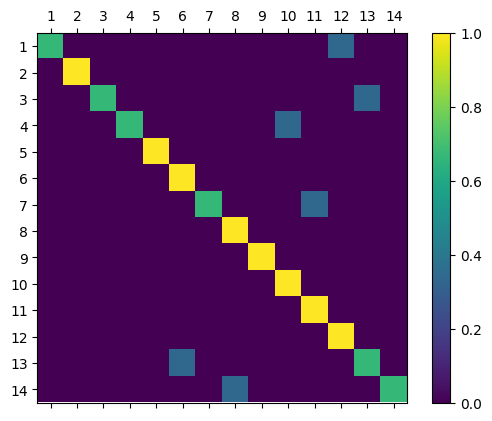

In [22]:

label = [i for i in cara_list]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mat_conf)
fig.colorbar(cax)
xaxis = np.arange(len(label))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
plt.show()